In [23]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import re

In [126]:
gali = 'gali-L-block.txt'
job = 'WhatsApp Chat with Job Seekers Hub.txt'

f = open(job,'r', encoding='UTF-8')
    #for line in file:
     #   print(line.strip())
data = f.read()
print(data)

28/01/2025, 10:42 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
29/01/2025, 10:25 am - +91 79820 07099: Guys , whenever any one shares his/her CV to you , asking for help, Ask him/her to send you a write up about the profile/Skills/Year of exp , People do read text at a glance.... But 9 out of 10 will never open your CV , Try to follow this practice and you will see better results👍
29/01/2025, 10:29 am - +91 79820 07099: Any one having exposure on liferay + alfresco 
Please share your resume to Madhulika.sharma@4aisoft.com
29/01/2025, 10:37 am - +91 83908 75348: Any vacancies in logistics?
29/01/2025, 10:37 am - +91 83908 75348: Mumbai Nasik or Pune
29/01/2025, 11:09 am - +91 79820 07099: A friend of mines is looking for *architect, structure engineers, MEPF engineers* with prior experience of Airport Projects. 
If anyone interested please share your CV

Company - *Surbana jurong India Pr

In [127]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[a-z]{1,2}\s-\s'

In [128]:
message = re.split(pattern, data)[1:]
message

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 79820 07099: Guys , whenever any one shares his/her CV to you , asking for help, Ask him/her to send you a write up about the profile/Skills/Year of exp , People do read text at a glance.... But 9 out of 10 will never open your CV , Try to follow this practice and you will see better results👍\n',
 '+91 79820 07099: Any one having exposure on liferay + alfresco \nPlease share your resume to Madhulika.sharma@4aisoft.com\n',
 '+91 83908 75348: Any vacancies in logistics?\n',
 '+91 83908 75348: Mumbai Nasik or Pune\n',
 '+91 79820 07099: A friend of mines is looking for *architect, structure engineers, MEPF engineers* with prior experience of Airport Projects. \nIf anyone interested please share your CV\n\nCompany - *Surbana jurong India Private limited*\nExperience - from 2 yrs to 20 yrs , Multiple positions\n',
 '+91 80079 73419: Hi \n\nA

In [129]:

date = re.findall(pattern, data)
date  = [s.replace('\u202f',' ') for s in date]
date  = [s.replace(' - ','') for s in date]


In [130]:
df = pd.DataFrame({'user_text':message,'text_date':date})
df

,user_text,text_date
0,Messages and calls are end-to-end encrypted. N...,"28/01/2025, 10:42 pm"
1,"+91 79820 07099: Guys , whenever any one share...","29/01/2025, 10:25 am"
2,+91 79820 07099: Any one having exposure on li...,"29/01/2025, 10:29 am"
3,+91 83908 75348: Any vacancies in logistics?\n,"29/01/2025, 10:37 am"
4,+91 83908 75348: Mumbai Nasik or Pune\n,"29/01/2025, 10:37 am"
...,...,...
271,+91 80561 47754 was added\n,"21/02/2025, 7:14 pm"
272,+91 99529 07811 added +91 80561 47754\n,"21/02/2025, 7:14 pm"
273,"+91 77603 36941: Team,\nCan anyone help how to...","22/02/2025, 9:54 am"
274,+91 77603 36941: Please help me with the scrip...,"22/02/2025, 11:18 am"


In [131]:
df['date'] = pd.to_datetime(df['text_date'],format='%d/%m/%Y, %I:%M %p')
df = df.drop(columns=['text_date'])
df.head()


,user_text,date
0,Messages and calls are end-to-end encrypted. N...,2025-01-28 22:42:00
1,"+91 79820 07099: Guys , whenever any one share...",2025-01-29 10:25:00
2,+91 79820 07099: Any one having exposure on li...,2025-01-29 10:29:00
3,+91 83908 75348: Any vacancies in logistics?\n,2025-01-29 10:37:00
4,+91 83908 75348: Mumbai Nasik or Pune\n,2025-01-29 10:37:00


In [132]:
users = []
messages = []
for message in df['user_text']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('grouop_notification')
        messages.append(entry[0])

df['username'] = users
df['message'] = messages

In [133]:
df.head()

,user_text,date,username,message
0,Messages and calls are end-to-end encrypted. N...,2025-01-28 22:42:00,grouop_notification,Messages and calls are end-to-end encrypted. N...
1,"+91 79820 07099: Guys , whenever any one share...",2025-01-29 10:25:00,+91 79820 07099,"Guys , whenever any one shares his/her CV to y..."
2,+91 79820 07099: Any one having exposure on li...,2025-01-29 10:29:00,+91 79820 07099,Any one having exposure on liferay + alfresco ...
3,+91 83908 75348: Any vacancies in logistics?\n,2025-01-29 10:37:00,+91 83908 75348,Any vacancies in logistics?\n
4,+91 83908 75348: Mumbai Nasik or Pune\n,2025-01-29 10:37:00,+91 83908 75348,Mumbai Nasik or Pune\n


In [ ]:
df.to_excel('test.xlsx')

In [ ]:
text = "John 9876543210 added to the group. Another user 123456789012 was added yesterday."

# Find all occurrences
matches = re.findall(r"\d{10,15}\swas\sadded", text)

In [ ]:
#df['user_text'].str.split(':',n=1, expand=True)[1:]

In [20]:
#df[['username', 'message']] = df['user_text'].str.split(':',n=1, expand=True)
#df['username'] = df['username'].str.strip().fillna("System")
#df['message'] = df['message'].str.strip()

In [134]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day'] = df['date'].dt.day_name()

In [135]:
df['hours'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [136]:
df = df.drop(columns=['user_text'])

In [24]:
#df = df[~df['username'].str.contains('joined using this group')]

#df = df[~df['username'].str.contains('changed the settings')]

#df = df[~df['username'].str.contains('removed ~')]
#df = df[~df['username'].str.contains('added ~')]

#df = df[~df['username'].str.contains("was added")]
#df = df[~df['username'].str.contains(r"removed\s[+91]", regex=True, na=False)]
#df = df[~df['username'].str.contains(r"added\s[+91]", regex=True, na=False)]
#df = df[~df['username'].str.contains("left")]

In [ ]:
df.to_excel('test.xlsx')

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=200, min_font_size=8, background_color='white')
df_wc = wc.generate(df['message'].str.cat(sep=""))
fig, ax = plt.subplots()
ax.imshow(df_wc)
ax.axis("off")

In [26]:
words = []
for txt in df['message'][1:]:
    words.extend(txt.split())

len(words)

4163

In [140]:
df['message'].to_list()

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Guys , whenever any one shares his/her CV to you , asking for help, Ask him/her to send you a write up about the profile/Skills/Year of exp , People do read text at a glance.... But 9 out of 10 will never open your CV , Try to follow this practice and you will see better results👍\n',
 'Any one having exposure on liferay + alfresco \nPlease share your resume to Madhulika.sharma@4aisoft.com\n',
 'Any vacancies in logistics?\n',
 'Mumbai Nasik or Pune\n',
 'A friend of mines is looking for *architect, structure engineers, MEPF engineers* with prior experience of Airport Projects. \nIf anyone interested please share your CV\n\nCompany - *Surbana jurong India Private limited*\nExperience - from 2 yrs to 20 yrs , Multiple positions\n',
 'Hi \n\nAny openings for tech support / app support in Pune /mumbai/banglore\n',
 'Post or pre-sales ?\nWhat ki

In [139]:
a = round((df['username'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'Name', 'username':'Percent'})
a.head()

,Name,Percent
0,grouop_notification,45.65
1,+91 79820 07099,11.23
2,+91 85888 23801,4.35
3,+91 85277 05911,3.26
4,+91 77603 36941,2.54


In [147]:
#df[df['username']=='grouop_notification']

df[df['message']=='<Media omitted>']
df['message'].to_list()

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Guys , whenever any one shares his/her CV to you , asking for help, Ask him/her to send you a write up about the profile/Skills/Year of exp , People do read text at a glance.... But 9 out of 10 will never open your CV , Try to follow this practice and you will see better results👍\n',
 'Any one having exposure on liferay + alfresco \nPlease share your resume to Madhulika.sharma@4aisoft.com\n',
 'Any vacancies in logistics?\n',
 'Mumbai Nasik or Pune\n',
 'A friend of mines is looking for *architect, structure engineers, MEPF engineers* with prior experience of Airport Projects. \nIf anyone interested please share your CV\n\nCompany - *Surbana jurong India Private limited*\nExperience - from 2 yrs to 20 yrs , Multiple positions\n',
 'Hi \n\nAny openings for tech support / app support in Pune /mumbai/banglore\n',
 'Post or pre-sales ?\nWhat ki

In [ ]:
df = df[df['message']!='<Media omitted>']

f = open('stop_hinglish.txt','r')
stop_word = f.read()
#print(stop_word)

In [ ]:
words = []
for message in df['message'].fillna(''):
    for word in message.lower().split():
        if word not in stop_word:
            words.append(word)
            
    
        

In [29]:
from collections import Counter
temp_df = pd.DataFrame(Counter(words).most_common(20))
temp_df = temp_df[~temp_df[0].str.contains(r"[&}{.,#_✅🔹•·]", regex=True, na=False)]

In [30]:
temp_df

,0,1
0,for,94
1,and,90
2,to,84
3,in,64
4,the,50
5,of,47
6,with,41
7,a,38
8,-,38
9,is,34


In [31]:
#emoji
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import emoji

In [35]:
emojis = []
for message in df['message'].dropna():
    emojis.extend([c for c in message if emoji.is_emoji(c)])
print(emojis)


df_emoji = pd.DataFrame(Counter(emojis).most_common())
#df_emoji[df_emoji[0].str.contains(r"✅🔹•·✔", regex=True, na=False)]

print(df_emoji)

['👍', '📢', '📢', '🚀', '📍', '💼', '⏳', '🔹', '🔹', '✅', '✅', '✅', '✅', '✅', '🔹', '✔', '✔', '🔹', '📌', '💼', '🚀', '🚀', '🚀', '📍', '⏳', '📢', '🔹', '✅', '✅', '✅', '✅', '✅', '✅', '🔹', '✔', '✔', '✔', '✔', '📌', '🚀', '🌟', '💼', '📍', '⏰', '🎓', '⏳', '🔑', '🔹', '🔹', '🔹', '📋', '✅', '✅', '✅', '✨', '📜', '🌟', '💰', '📧', '⚠', '👨', '💼', '🚀', '👆', '🚀', '🔹', '🔹', '🔹', '🔹', '🔹', '📩', '👆', '🙏', '📢', '📢', '📩', '🚀']
    0   1
0   🔹  14
1   ✅  14
2   🚀   8
3   ✔   6
4   📢   5
5   💼   4
6   📍   3
7   ⏳   3
8   📌   2
9   🌟   2
10  👆   2
11  📩   2
12  👍   1
13  ⏰   1
14  🎓   1
15  🔑   1
16  📋   1
17  ✨   1
18  📜   1
19  💰   1
20  📧   1
21  ⚠   1
22  👨   1
23  🙏   1


In [44]:
df_emoji[~df_emoji[0].isin(['✅', '🔹', '✔'])]

,0,1
2,🚀,8
4,📢,5
5,💼,4
6,📍,3
7,⏳,3
8,📌,2
9,🌟,2
10,👆,2
11,📩,2
12,👍,1


In [68]:
df_emoji = df_emoji[~df_emoji[0].isin(['✅', '🔹', '✔'])]

emoji_counts=df_emoji.to_dict()
labels = df_emoji[0].to_list()
sizes = df_emoji[1].to_list()

In [76]:
df

,date,username,message,year,month,day,hours,minute
0,2025-01-28 22:42:00,Messages and calls are end-to-end encrypted. N...,None,2025,January,Tuesday,22,42
1,2025-01-29 10:25:00,+91 79820 07099,"Guys , whenever any one shares his/her CV to y...",2025,January,Wednesday,10,25
2,2025-01-29 10:29:00,+91 79820 07099,Any one having exposure on liferay + alfresco ...,2025,January,Wednesday,10,29
3,2025-01-29 10:37:00,+91 83908 75348,Any vacancies in logistics?,2025,January,Wednesday,10,37
4,2025-01-29 10:37:00,+91 83908 75348,Mumbai Nasik or Pune,2025,January,Wednesday,10,37
...,...,...,...,...,...,...,...,...
269,2025-02-21 18:59:00,+91 87438 33535,We are looking for Sales executives to sell Pa...,2025,February,Friday,18,59
270,2025-02-21 19:00:00,+91 87438 33535,Message me one o one,2025,February,Friday,19,0
273,2025-02-22 09:54:00,+91 77603 36941,"Team,\nCan anyone help how to patch multiple s...",2025,February,Saturday,9,54
274,2025-02-22 11:18:00,+91 77603 36941,Please help me with the script in powrshell to...,2025,February,Saturday,11,18


In [81]:
timeline = df.groupby(['year','month'])['message'].count().reset_index()

In [82]:
timeline

,year,month,message
0,2025,April,19
1,2025,August,4
2,2025,December,1
3,2025,February,25
4,2025,January,29
5,2025,July,9
6,2025,June,14
7,2025,March,1
8,2025,May,32
9,2025,November,1


In [101]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [104]:
timeline['time'] = time

In [106]:
timeline

,year,month,message,time
0,2025,April,19,April-2025
1,2025,August,4,August-2025
2,2025,December,1,December-2025
3,2025,February,25,February-2025
4,2025,January,29,January-2025
5,2025,July,9,July-2025
6,2025,June,14,June-2025
7,2025,March,1,March-2025
8,2025,May,32,May-2025
9,2025,November,1,November-2025


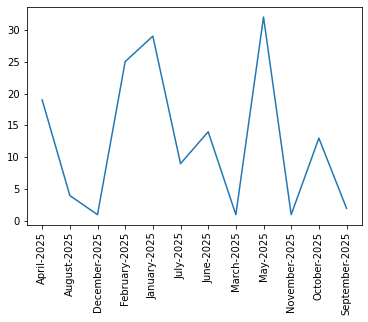

In [111]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [128]:
df['date_new'] = df['date'].dt.date
timeline_daily = df.groupby('date_new')['message'].count().reset_index()
timeline_daily


,date_new,message
0,2025-01-28,0
1,2025-01-29,9
2,2025-01-30,9
3,2025-01-31,11
4,2025-02-02,6
5,2025-02-13,2
6,2025-02-14,1
7,2025-02-18,7
8,2025-02-19,1
9,2025-02-20,3


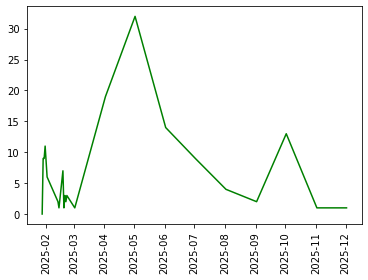

In [130]:
plt.plot(timeline_daily['date_new'],timeline_daily['message'],color='green')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#activity by days

In [171]:
dailytime_days = df.groupby('day')['message'].count().reset_index().sort_values(by='message',ascending=False)
mapping = {'Friday':5, 'Wednesday':3, 'Thursday':4, 'Monday':1, 'Tuesday':2, 'Sunday':7, 'Saturday':6}
dailytime_days['order'] = dailytime_days['day'].map(mapping)
dailytime_days=dailytime_days.sort_values(by='order')

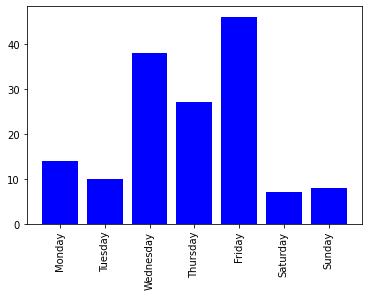

In [179]:
plt.bar(dailytime_days['day'], dailytime_days['message'],color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [163]:
mapping = {'Friday':5, 'Wednesday':3, 'Thursday':4, 'Monday':1, 'Tuesday':2, 'Sunday':7, 'Saturday':6}
dailytime_days['order'] = dailytime_days['day'].map(mapping)

In [190]:
max_index = np.argmax(dailytime_days['message'])

In [221]:
max_index = np.argmax(dailytime_days['message'])
dailytime_days.iloc[max_index][0]

'Friday'

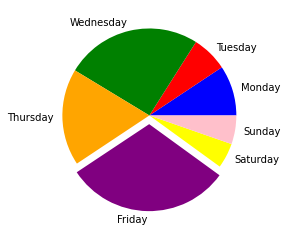

In [205]:
explode = [.1 if i==max_index else 0 for i in range(len(dailytime_days['message']))]
plt.pie(dailytime_days['message'],labels=dailytime_days['day'], explode=explode,
        colors=['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'pink'])

plt.show()

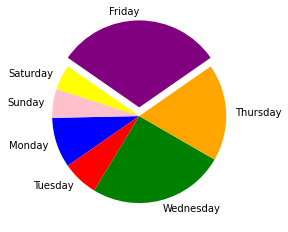

In [210]:
sizes = dailytime_days['message'].to_list()
total = sum(sizes)
angle = (sum(sizes[:max_index]) + sizes[max_index] / 2) / total * 360  # Midpoint of the max slice
startangle = 90 - angle  # Adjust to bring max slice to the top
plt.pie(dailytime_days['message'],labels=dailytime_days['day'], explode=explode,startangle=startangle,
        colors=['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'pink'])

plt.show()

In [230]:
np.argmax(np.sort(dailytime_days['message']))-1

5

In [238]:
#second most day by message
dailytime_days.sort_values(by='message', ascending=False).iloc[1]['day']

'Wednesday'

In [253]:
period = []
for hours in df[['day','hours']]['hours']:
    if hours==23:
        period.append(str(hours)+'-'+str('00'))
    elif hours==0:
        period.append(str('00')+'-'+str(hours+1))
    else:
        period.append(str(hours)+'-'+str(hours+1))
            
df['period'] =   period            

<AxesSubplot:xlabel='period', ylabel='day'>

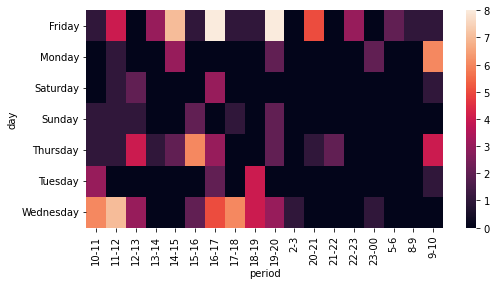

In [261]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(df.pivot_table(index='day',columns='period', values='message',aggfunc='count').fillna(0))
